In [10]:
import cv2
import numpy as np
from MTM import matchTemplates, drawBoxesOnRGB

import cv2
from skimage.data import coins
from skimage.data import immunohistochemistry
import matplotlib.pyplot as plt

In [11]:
from multi_scale_edge_detection.MultiScaleContourDetector import multi_scale_contour_detection_with_inhibition

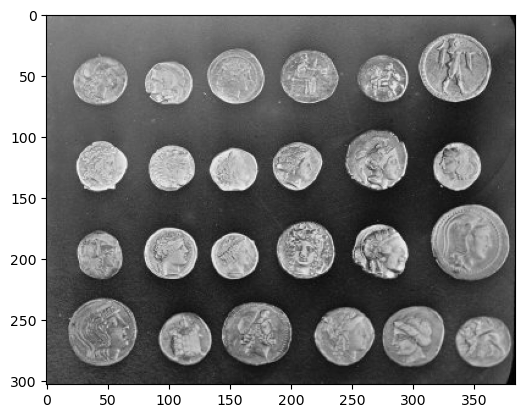

In [12]:
image = coins()
plt.imshow(image, cmap="gray")

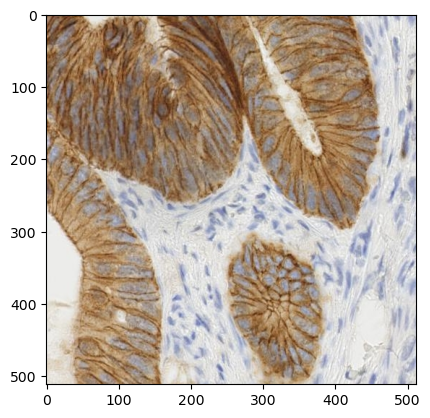

In [13]:
image1 = immunohistochemistry()
plt.imshow(image1, cmap="gray")

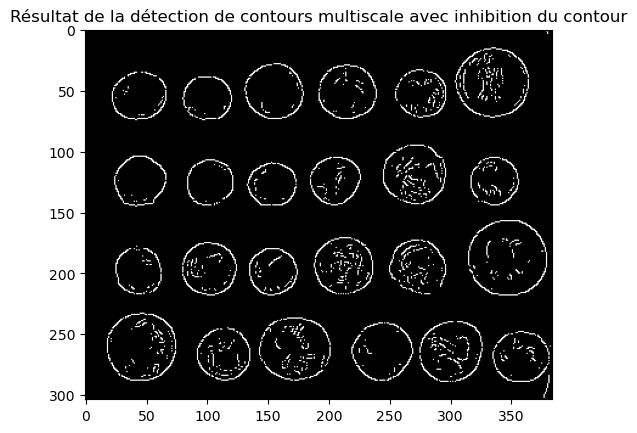

In [14]:
result = multi_scale_contour_detection_with_inhibition(image, N=5, sigma=1, alpha=0.00001)

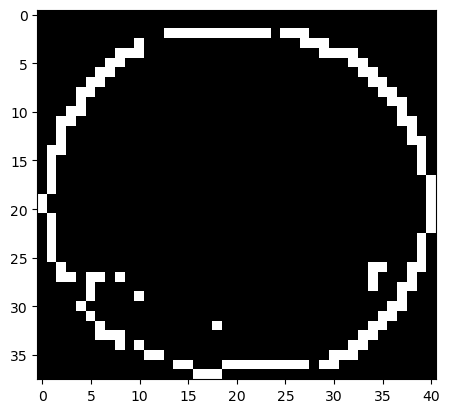

In [15]:
smallCoin = result[37:37+38, 80:80+41] 


plt.imshow(smallCoin, cmap="gray")

In [16]:
# 1st format the template into a list of tuple (label, templateImage)
listTemplate = [('small', smallCoin)]

# Then call the function matchTemplates (here a single template)
Hits = matchTemplates(listTemplate, result, score_threshold=0.3, method=cv2.TM_CCOEFF_NORMED, maxOverlap=0)

In [17]:
print("Found {} hits".format( len(Hits.index) ) )
Hits

Found 9 hits


,TemplateName,BBox,Score
0,small,"(80, 37, 41, 38)",1.000000
1,small,"(133, 108, 41, 38)",0.488555
2,small,"(134, 179, 41, 38)",0.483098
3,small,"(26, 103, 41, 38)",0.399747
4,small,"(316, 105, 41, 38)",0.378781
5,small,"(186, 103, 41, 38)",0.367588
6,small,"(27, 34, 41, 38)",0.353755
7,small,"(82, 106, 41, 38)",0.330514
8,small,"(229, 244, 41, 38)",0.325215


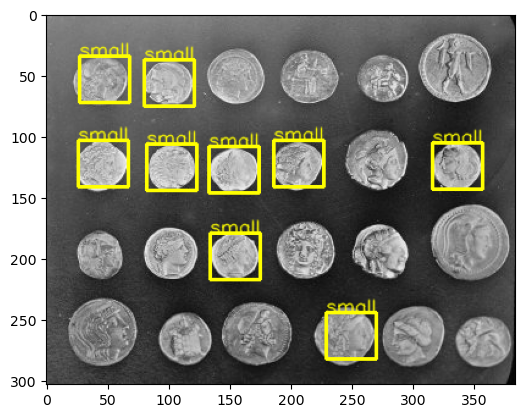

In [18]:
Overlay = drawBoxesOnRGB(image, Hits, showLabel=True)
plt.imshow(Overlay)

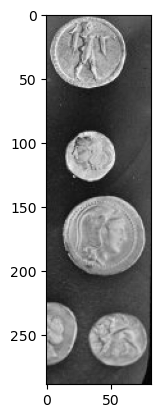

In [19]:
largeCoin = coins()[14:14+459,302:402+65]

plt.imshow(largeCoin, cmap="gray")

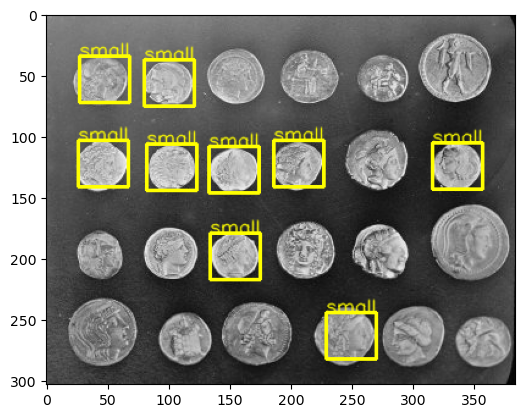

In [20]:
listTemplate = [("small", smallCoin), ("large", largeCoin)]
Hits = matchTemplates(listTemplate, result, score_threshold=0.3, method=cv2.TM_CCOEFF_NORMED, maxOverlap=0)
Overlay = drawBoxesOnRGB(image, Hits, showLabel=True)
plt.imshow(Overlay)

In [21]:
import cv2

# Path to the video file
video_path = 'boat.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video file was successfully opened
if not cap.isOpened():
    print("Error: Unable to open video file.")
    exit()

# Initialize an empty list to store frames
frames = []

# Read the video frame by frame
while True:
    # Read a frame from the video
    ret, frame = cap.read()

    # Check if the frame was successfully read
    if not ret:
        break

    # Append the frame to the frames list
    frames.append(frame)

# Release the video capture object
cap.release()

# Convert the list of frames to a numpy array
frames_array = np.array(frames)

# Print the shape of the frames array
print("Shape of frames array:", frames_array.shape)


Shape of frames array: (300, 720, 1280, 3)


In [22]:
normalized_frames = []

# Iterate over each frame array
for frame in frames_array:
    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Normalize the pixel values to range [0, 1]
    normalized_frame = gray_frame / 255.0
    
    # Append the normalized grayscale frame to the list
    normalized_frames.append(normalized_frame)

print("Normalization and storing completed.")

Normalization and storing completed.


In [ ]:
# Create an empty list to store the results
results_list = []

# Iterate over each normalized grayscale frame
for frame in normalized_frames:
    # Apply the function to the current frame and store the result
    result = multi_scale_contour_detection_with_inhibition(frame, N=8, sigma=1, alpha=0.00001)
    
    # Append the result to the results_list
    results_list.append(result)

print("Multi-scale contour detection completed for all frames.")

In [24]:
resy = len(results_list)
resy

56

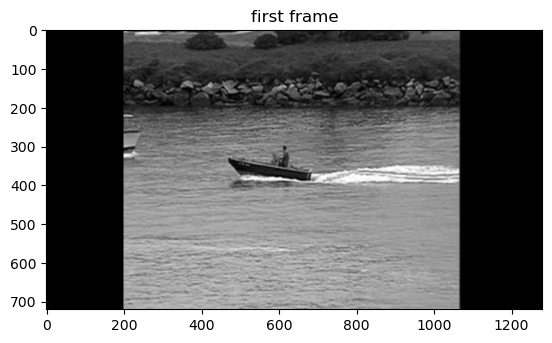

In [26]:
frame1 = normalized_frames[0]
plt.imshow(frame1 , cmap='gray')
plt.title('first frame')
plt.show()

In [27]:
import cv2
import numpy as np

# Convert the image to grayscale
gray_image = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

# Normalize the pixel values to range [0, 1]
normalized_image = gray_image / 255.0

# Save the images to files
cv2.imwrite('original_image.jpg', gray_image)
cv2.imwrite('normalized_image.jpg', normalized_image * 255.0)

print("Images saved successfully.")

error: OpenCV(4.9.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x59191d0d::Set<1,-1,-1>,struct cv::impl::A0x59191d0d::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


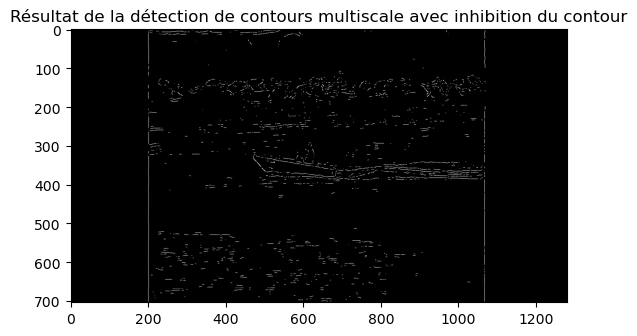

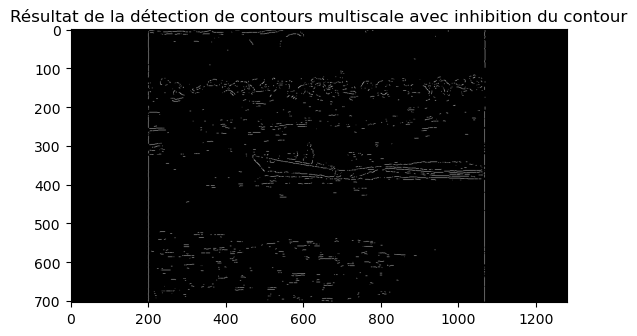

In [28]:
results1 = multi_scale_contour_detection_with_inhibition(frame1, N=6, sigma=1, alpha=0.00001)
results2 = multi_scale_contour_detection_with_inhibition(normalized_frames[1], N=6, sigma=1, alpha=0.00001)

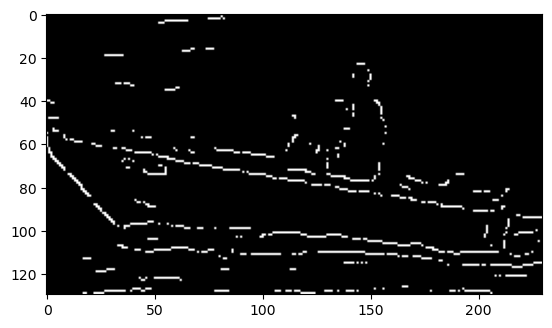

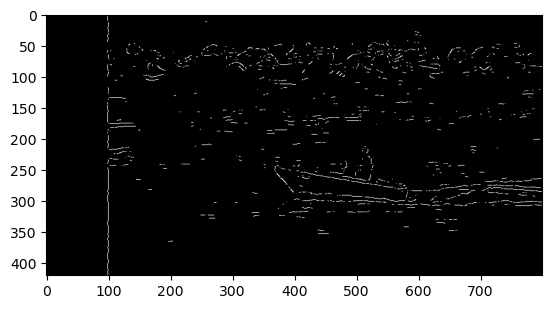

In [33]:
temp1 = results1[270:400,470:700]
temp2 = results2[80:500,100:900]
plt.figure(0)
plt.imshow(temp1, cmap="gray")
plt.figure(1)
plt.imshow(temp2, cmap="gray")

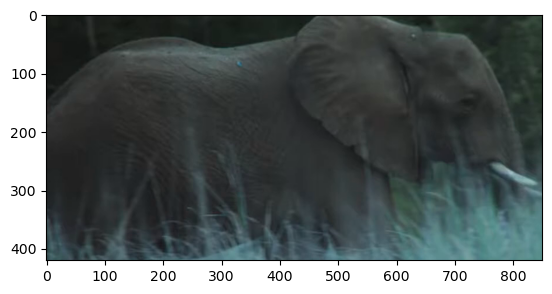

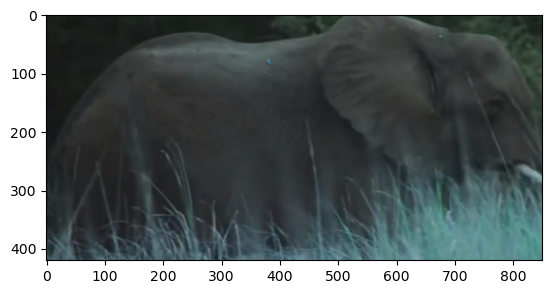

In [ ]:
temp3 = frames[0][80:500,100:950]
temp4 = frames[15][80:500,100:950]
plt.figure(0)
plt.imshow(temp3, cmap="gray")
plt.figure(1)
plt.imshow(temp4, cmap="gray")

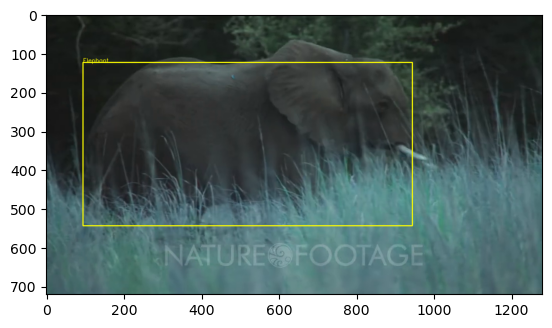

In [ ]:
listTemplate = [("Elephant", temp4), ("ELEPHANT", temp3)]
Hits = matchTemplates(listTemplate, frames[250], score_threshold=0.5, method=cv2.TM_CCOEFF_NORMED, maxOverlap=0)
Overlay = drawBoxesOnRGB(frames_array[15], Hits, showLabel=True)
plt.imshow(Overlay)

In [ ]:
print("Found {} hits".format( len(Hits.index) ) )
Hits

Found 0 hits


,TemplateName,BBox,Score


## using edge distance  


In [ ]:
import cv2
import numpy as np

def edge_distance(image1, image2):
    
    gray1 = image1
    gray2 = image2
    # Apply Canny edge detection
    edges1 = multi_scale_contour_detection_with_inhibition(gray1, N=3, sigma=1, alpha=0.001)
    edges2 = multi_scale_contour_detection_with_inhibition(gray2, N=3, sigma=1, alpha=0.001)

    # Calculate the distance between edge pixels in each image
    dist1 = cv2.distanceTransform(edges1, cv2.DIST_L2, 3)
    dist2 = cv2.distanceTransform(edges2, cv2.DIST_L2, 3)

    # Normalize distance maps
    cv2.normalize(dist1, dist1, 0, 1.0, cv2.NORM_MINMAX)
    cv2.normalize(dist2, dist2, 0, 1.0, cv2.NORM_MINMAX)

    # Compute the absolute difference between distance maps
    diff = cv2.absdiff(dist1, dist2)

    # Compute the similarity score
    similarity = np.sum(diff)

    return similarity

def template_matching(template, target):
    # Find template dimensions
    th, tw = template.shape[:2]

    # Compute the barycenter of the target image
    ty, tx = target.shape[:2]
    barycenter_x = tx // 2
    barycenter_y = ty // 2

    # Compute the size of the ROI
    roi_size_x = tw * 2
    roi_size_y = th * 2

    # Define the ROI boundaries
    roi_x = max(0, barycenter_x - roi_size_x // 2)
    roi_y = max(0, barycenter_y - roi_size_y // 2)
    roi_width = min(tx - roi_x, roi_size_x)
    roi_height = min(ty - roi_y, roi_size_y)

    # Slide template over the target image within the ROI and calculate similarity scores
    best_similarity = float('inf')
    best_location = None
    for y in range(roi_y, roi_y + roi_height - th):
        for x in range(roi_x, roi_x + roi_width - tw):
            roi = target[y:y+th, x:x+tw]
            similarity = edge_distance(template, roi)
            if similarity < best_similarity:
                best_similarity = similarity
                best_location = (x, y)

    return best_location



if __name__ == "__main__":
    # Load images
    template_img = frame1[270:400,470:700]
    target_img = normalized_frames[10]

    # Find the best location for template matching
    best_loc = template_matching(template_img, target_img)

    # Draw rectangle around the matched region
    tw, th = template_img.shape[:2]
    cv2.rectangle(target_img, best_loc, (best_loc[0] + tw, best_loc[1] + th), (0, 255, 0), 2)

    # Display result
    cv2.imshow('Template Matching', target_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
